In [18]:
#needed to make web requests
import requests

#store the data we get as a dataframe
import pandas as pd

#convert the response as a strcuctured json
import json

#mathematical operations on lists
import numpy as np

#parse the datetimes we get from NOAA
from datetime import datetime

#add the access token you got from NOAA
Token = 'rJqcMNUmBGxhWYfqPkWrVehFHGBeIyIL'

#Long Beach Airport station
station_id = 'GHCND:US1WAKP0006'

In [23]:
url='https://www.ncdc.noaa.gov/cdo-web/api/v2/stations/'+station_id

r = requests.get(url, headers={'Token':Token})
#load the api response as a json
d = json.loads(r.text)
d

{'elevation': 7,
 'mindate': '2008-06-01',
 'maxdate': '2020-03-29',
 'latitude': 47.69194,
 'name': 'BAINBRIDGE ISLAND 2.6 NNW, WA US',
 'datacoverage': 1,
 'id': 'GHCND:US1WAKP0006',
 'elevationUnit': 'METERS',
 'longitude': -122.549777}

In [22]:
url='https://www.ncdc.noaa.gov/cdo-web/api/v2/datasets?stationid='+station_id

r = requests.get(url, headers={'Token':Token})
#load the api response as a json
d = json.loads(r.text)
d

{'metadata': {'resultset': {'offset': 1, 'count': 2, 'limit': 25}},
 'results': [{'uid': 'gov.noaa.ncdc:C00861',
   'mindate': '1763-01-01',
   'maxdate': '2020-03-30',
   'name': 'Daily Summaries',
   'datacoverage': 1,
   'id': 'GHCND'},
  {'uid': 'gov.noaa.ncdc:C00946',
   'mindate': '1763-01-01',
   'maxdate': '2020-02-01',
   'name': 'Global Summary of the Month',
   'datacoverage': 1,
   'id': 'GSOM'}]}

In [26]:
url= 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:US1WAKP0006&units=metric&startdate=2010-05-01&enddate=2010-05-31'
r = requests.get(url, headers={'Token':Token})
#load the api response as a json
d = json.loads(r.text)


In [70]:
from datetime import date
start = '2019-02-20'
end = '2020-02-20'
url= 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid={}&units=metric&startdate={}&enddate={}&limit=1000'
r = requests.get(url.format(station_id,start, end), headers={'Token':Token})
#load the api response as a json
d = json.loads(r.text)

In [71]:
result_df = pd.DataFrame(d['results'])

In [72]:
result_df.index = result_df['date']

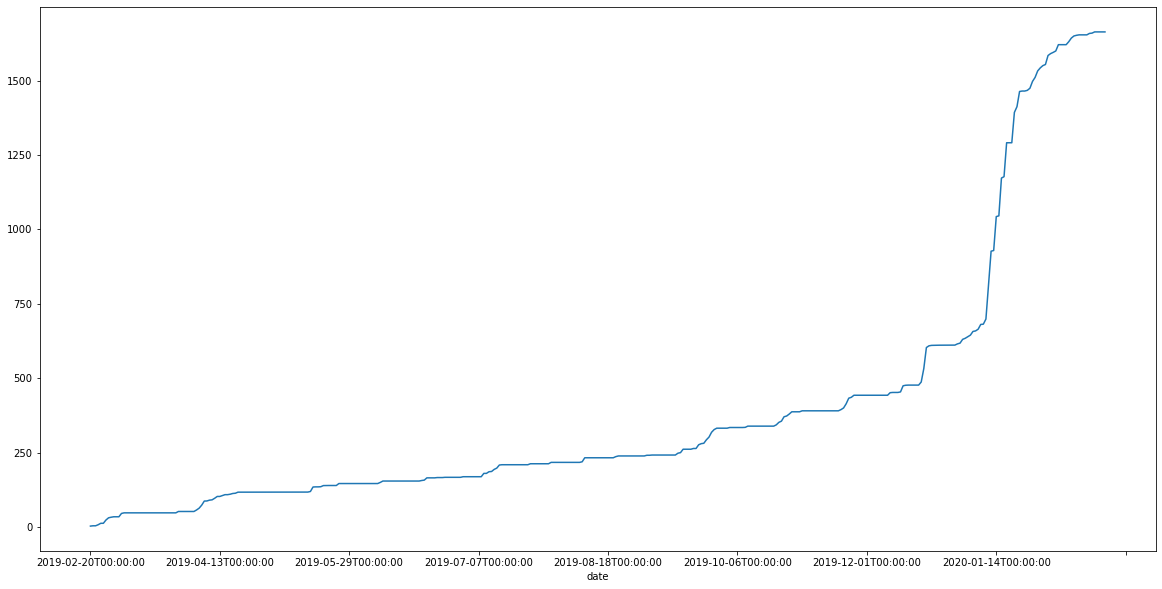

In [74]:
result_df['value'].cumsum().plot(figsize=(20,10))

In [16]:
#initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
prcp = []

#for each year from 2015-2019 ...
for year in range(2015, 2020):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00023129&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'Token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]


working on year 2015
working on year 2016
working on year 2017
working on year 2018
working on year 2019


In [17]:
d

{'metadata': {'resultset': {'offset': 1, 'count': 365, 'limit': 1000}},
 'results': [{'date': '2019-01-01T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USW00023129',
   'attributes': 'H,,S,',
   'value': 128},
  {'date': '2019-01-02T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USW00023129',
   'attributes': 'H,,S,',
   'value': 105},
  {'date': '2019-01-03T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USW00023129',
   'attributes': 'H,,S,',
   'value': 114},
  {'date': '2019-01-04T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USW00023129',
   'attributes': 'H,,S,',
   'value': 116},
  {'date': '2019-01-05T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USW00023129',
   'attributes': 'H,,S,',
   'value': 123},
  {'date': '2019-01-06T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USW00023129',
   'attributes': 'H,,S,',
   'value': 124},
  {'date': '2019-01-07T00:00:00',
   'datatype': 'TAVG',
   'station': 'GHCND:USW00023129',
   'attri